<a href="https://colab.research.google.com/github/epicalekspwner/BigScaleAnalytics2021/blob/main/Clean_NB_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1/**Libraries and lists**

In [2]:
#Libraries

import pandas as pd
import re
import string
from collections import Counter
import itertools
from collections import OrderedDict
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
from collections import Counter
import matplotlib.pyplot as plt



In [3]:
pip install spacy-lefff

     |████████████████████████████████| 3.0MB 3.7MB/s 
     |████████████████████████████████| 12.8MB 298kB/s 
     |████████████████████████████████| 9.1MB 32.6MB/s 
     |████████████████████████████████| 460kB 53.0MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 1.1MB 45.4MB/s 
     |████████████████████████████████| 122kB 43.6MB/s 
  Created wheel for spacy-lefff: filename=spacy_lefff-0.4.0-cp37-none-any.whl size=2929893 sha256=1205a9085417d97a07905e0eb0b2ccd1726366494e11ee5cf2c361fdc8fdaad8
  Stored in directory: /root/.cache/pip/wheels/5c/1c/f0/9b95e4e74005afbfe54aa126484febacf0fd27feffa3e9ad45
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=0ec3e78f931613068ff00355d41678fa2b64368036f700e6f6b235ea0a1f9a03
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built spacy-lefff smart-open
  Found existing installation: c

In [4]:
# Spacy library

!python -m spacy download fr_core_news_lg

from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
import spacy
from spacy_lefff import LefffLemmatizer
from spacy.language import Language

nlp = spacy.load("fr_core_news_lg")

2021-05-08 15:25:31.436635: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 573.4MB 22kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_lg')


In [5]:
# NLTK --> Stemming

from nltk.stem.porter import *
from nltk.stem.snowball import SnowballStemmer

stemmer = PorterStemmer()
stemmerfr = SnowballStemmer("french")

In [6]:
nlp = spacy.load('fr_core_news_lg')

In [7]:
pip install deep-translator

In [8]:
from deep_translator import GoogleTranslator

In [9]:
# Special lists/dict of char

liste_special_letters = ['é','è','ê','ë','à','ä','â','ï','î','ö','ô','ü','ù','û','ç']
contractions_dict = { "d'": "de ","n'":"ne ","l'":"le ","s'":"se ","c'":"ce ","j'":"je ","t'":"tu ","qu'":"que "}
stopWord = ['le','la','les','de','des','se','ce','à']
Fr_stp_modif = {'a', 'abord', 'afin', 'ah', 'ai', 'aie', 'ainsi',
 'alors', 'anterieur', 'anterieure', 'anterieures', 'apres', 'après', 
 'assez',  'au', 'aucun', 'aucune', 'aujourd', "aujourd'hui", 'aupres',
 'auquel', 'aussi', 'autre', 'autrement', 'autres', 'autrui',
 'aux',  'auxquelles', 'auxquels',  'avant', 'avec',  'bas', 'basee', 'car', 'ce', 'ceci',
 'cela', 'celle', 'celle-ci', 'celle-là', 'celles', 'celles-ci', 'celles-là', 'celui',
 'celui-ci', 'celui-là', 'cent', 'cependant', 'certain', 'certaine', 'certaines', 'certains', 'certes', 'ces', 'cet', 'cette', 'ceux',
 'ceux ci', 'ceux là', 'chacun', 'chacune', 'chaque', 'chez', 'ci', 'cinq', 'cinquantaine', 'cinquante', 'cinquantième', 'cinquième',
 'combien', 'comme', 'comment', 'compris', 'concernant', 'da', 'dans', 'de', 'debout', 'dedans', 'dehors', 'deja', 'delà', 'depuis',
 'derriere', 'derrière', 'des', 'desormais', 'desquelles', 'desquels', 'dessous', 'dessus', 'deux', 'deuxième', 'deuxièmement', 'devant',
 'devers', 'devra', 'different', 'differentes', 'differents', 'différent', 'différente', 'différentes', 'différents', 'dire', 'directe',
 'directement', 'divers', 'diverse', 'diverses', 'dix', 'dix huit', 'dix neuf', 'dix sept', 'dixième', 'donc', 'dont', 'douze',
 'douzième', 'du', 'duquel', 'durant','dès', 'désormais', 'effet','egale', 'egalement', 'egales', 'eh', 'elle', 'elle même',
 'elles', 'elles mêmes', 'en', 'encore', 'enfin', 'entre','envers', 'environ','et', 'etc', 'eux', 'eux mêmes',
 'exactement',
 'excepté',
  'chat'
  'chien'
 'façon',

 'gens',
 'ha',
 'hem',
 'hep',
 'hi',
 'ho',
 'hormis',
 'hors',
 'hou',
 'houp',
 'hue',
 'hui',
 'huit',
 'huitième',
 'hé',
 'i',
 'il',
 'ils',
 'importe',
 "j ",
 'je',
 'jusqu',
 'jusque',
 'juste',
 'j ',
 "l ",
 'la',
 'laquelle',
 'le',
 'lequel',
 'les',
 'lesquelles',
 'lesquels',
 'leur',
 'leurs',
 'longtemps',
 'lors',
 'lorsque',
 'lui',
 'lui meme',
 'lui même',
 'là',
 'lès',
 'l ',
 "m ",
 'ma',
 'maint',
 'maintenant',
 'mais',
 'malgré',
 'me',
 'meme',
 'memes',
 'merci',
 'mes',
 'mien',
 'mienne',
 'miennes',
 'miens',
 'mille',
 'moi',
 'moi meme',
 'moi même',
 'moindres',
 'moins',
 'mon',
 'même',
 'mêmes',
 'm ',
 "n ",
 'na',
 'ne',
 'neanmoins',
 'neuvième',
 'ni',
 'nombreuses',
 'nombreux',
 'nos',
 'notamment',
 'notre',
 'nous',
 'nous-mêmes',
 'nouvea',
 'nul',
 'néanmoins',
 'nôtre',
 'nôtres',
 'n’',
 'o',
 'on',
 
 'onze',
 'onzième',
 'ore',
 'ou',
 'ouias',
 'oust',
 'outre',

 'ouverte',
 'ouverts',
 'où',
 'par',
 'parce',
 'parfois',
 'parmi',
 'parseme',
 'partant',
 'pas',
 'pendant',
 'pense',
 'permet',
 'personne',
 'peu',

 'plus',
 'plusieurs',
 'plutôt',
 'possible',
 'possibles',
 'pour',
 'pourquoi',

 'prealable',
 'precisement',
 'premier',
 'première',
 'premièrement',
 'pres',
 'procedant',
 'proche',
 'près',
 'pu',
 'puis',
 'puisque',
 "qu'",
 'quand',
 'quant',
 'quant à soi',
 'quanta',
 'quarante',
 'quatorze',
 'quatre',
 'quatre vingt',
 'quatrième',
 'quatrièmement',
 'que',
 'quel',
 'quelconque',
 'quelle',
 'quelles',
 "quelqu'un",
 'quelque',
 'quelques',
 'quels',
 'qui',
 'quiconque',
 'quinze',
 'quoi',
 'quoique',
 'qu’',
 'relative',
 'relativement',
 

 'retour',
 'revoici',
 'revoilà',
 "s ",
 'sa',
 'sait',
 'sans',
 'sauf',
 'se',
 'seize',
 'selon',
 'semblable',
 'semblaient',
 'semble',
 'semblent',
 'sent',
 'sept',
 'septième',

 'ses',
 'seul',
 'seule',
 'seulement',
 'si',
 'sien',
 'sienne',
 'siennes',
 'siens',
 'sinon',
 'six',
 'sixième',
 'soi',
 'soi même',
 'soit',
 'soixante',
 'son',

 'sous',
 'souvent',
 'specifique',
 'specifiques',
 'stop',
 'suffisant',
 'suffisante',

 'suivant',
 'suivante',
 'suivantes',
 'suivants',
 'suivre',
 'sur',
 'surtout',
 's ',
 "t ",
 'ta',
 'tant',
 'te',
 'tel',
 'telle',
 'tellement',
 'telles',
 'tels',
 'tenant',

 'tente',
 'tes',
 'tien',
 'tienne',
 'tiennes',
 'tiens',
 'toi',
 'toi-même',
 'ton',
 'touchant',
 'toujours',
 'tous',
 'tout',
 'toute',
 'toutes',
 'treize',
 'trente',
 'tres',
 'trois',
 'troisième',
 'troisièmement',
 'tu',
 'té',
 't ',
 'un',
 'une',
 'unes',
 'uns',
 'va',
 'vais',
 'vas',
 'vers',
 'via',
 'vingt',
 'voici',
 'voilà',
 'vont',
 'vos',
 'votre',
 'vous',
 'vous mêmes',
 'vu',
 'vé',
 'vôtre',
 'vôtres',
 'à',
 'â',
 'ça',
 'ès',
 'ô'}



In [10]:
name_female = pd.read_csv('https://gist.githubusercontent.com/dmassiani/c669d79aa27b93cf03b8f0eb5088bde6/raw/52fad81fa091b23a812259e114bb5f11f9691ade/Liste%2520des%2520pr%25C3%25A9noms%2520fran%25C3%25A7ais%2520f%25C3%25A9minins', header=None)
name_male = pd.read_csv('https://gist.githubusercontent.com/dmassiani/d3ad74eed7903dd2e36fb71b0d5de39e/raw/fa34fd3d006171ae92842e3ec7b06647609f726f/Liste%2520des%2520pr%25C3%25A9noms%2520fran%25C3%25A7ais%2520masculins', header= None)
name_list = name_female.values.tolist()
name_list.append(name_male.values.tolist())

In [11]:
len(name_list)

459

# 2/ **Data cleaning**

### Cleaning

In [12]:
# Dataframe with french sentences and level

df = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/train_data.txt?token=AQ7V5XW3VL7FAFWEOJHQSOLATJ7KG', delimiter=',')
df = df.sample(frac=1).reset_index(drop=True)
df = df.rename(columns = {'sentence':'Sentences','difficulty':'Level'})
df['Level_cat'] = df['Level'].astype('category').cat.codes
#NOTE:to apply these functions make sure that the language level are called "Level" and the sentences "Sentences"'''

In [207]:
df_testset = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/TESTAICROWD.csv?token=AQ7V5XXOICVOIBBSXSVH27TAT7246')
df_testset = df_testset.rename(columns = {'sentence':'Sentences'})

In [13]:
base_rate = max(df.value_counts('Level'))/df.shape[0]
print('Base rate:', round(base_rate,2))

Base rate: 0.17


In [14]:
def cleaning_general(df):

    # Data cleaning 1 --> char replacement + lower

    df['Sentences'] = df['Sentences'].apply(lambda x: x.replace("’","'"))
    df['Sentences'] = df['Sentences'].apply(lambda x: x.lower())


#-------------------------------------------------------------------------------


    # Punctuation counter
  
    def punctuation_counter(sentence):  
      counter = 0
      for i in range (0, len(sentence)):
        if sentence[i] in string.punctuation:
          counter += 1
      return counter
      
    df['Sentences_punctuation_nb'] = df['Sentences'].apply(lambda x:punctuation_counter(x)) 


#-------------------------------------------------------------------------------


    # Data cleaning 2 --> Contractions expanding

    contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

        # Function for expanding contractions

    def expand_contractions(text,contractions_dict=contractions_dict):
      def replace(match):
        return contractions_dict[match.group(0)]
      return contractions_re.sub(replace, text)

    df['Cleaning1'] = df['Sentences'].apply(lambda x: expand_contractions(x))


    #-------------------------------------------------------------------------------


    # Data cleaning 3 --> Punctuation removal

    def punctuation_removal(text):
        all_list = [char for char in text if char not in string.punctuation]
        clean_str = ''.join(all_list)
        return clean_str

    df['Cleaning2'] = df['Cleaning1'].apply(lambda x: punctuation_removal(x))


#-------------------------------------------------------------------------------

        # Length of a sentence (Aleks)


    def sentence_lenght(df):
      length_sentence = len(df.split())
      return length_sentence

    df['Sentences_length'] = df['Cleaning2'].apply(lambda x:sentence_lenght(x))

#-------------------------------------------------------------------------------


    # Data cleaning 4 --> Remove special char (took into account french special char e.g. "ç","é")

    def bin_spe(tweet):
        tweet = ' '.join(re.sub("[^0-9a-zÀ-ÿ-A-Z-ç \t]"," ", tweet).split())
        return tweet

    df['Cleaning3'] = df['Cleaning2'].apply(lambda x: bin_spe(x))


    #-------------------------------------------------------------------------------


    # Data cleaning 5 --> Stop words removal and names

    def stopword_removal(text):
        all_list = [char for char in text if char not in stopWord ]
        all_list = [char for char in text if char not in name_list]
        clean_str = ''.join(all_list)
        return clean_str

    df['Cleaning3'] = df['Cleaning2'].apply(lambda x: stopword_removal(x))


    #-------------------------------------------------------------------------------


    # Data cleaning 6 --> remove alone letter and words with len() ==2

    def remove_alone_letters_and_len2(texte):
        texte = ' '.join(i for i in texte.split() if not len(i) == 1 and not len(i) == 2)
        return texte

    df['Cleaning4'] = df['Cleaning3'].apply(lambda x: remove_alone_letters_and_len2(x))

    return df

In [15]:
def lemma_and_Leff(df1):
    
    
    # Count top 100 words whole dataset

    Counter(" ".join(df1["Cleaning4"]).split()).most_common(100)


    #-------------------------------------------------------------------------------


    # Lemmatization --> OUTPUT: Token

    def lemma_french_token(text):
      doc = nlp(text)
      liste1 = []
      for token in doc:
        liste1.append(token.lemma_)
      return liste1

    df1['lemma'] = df1['Cleaning4'].apply(lambda x: lemma_french_token(x))


    #-------------------------------------------------------------------------------


    # Lemmatization --> OUTPUT: sentence

    def lemma_french_full_sentence(text):
      doc = nlp(text)
      lemmatized_output = ' '.join([w.lemma_ for w in doc])
      return lemmatized_output

    df1['lemma'] = df1['Cleaning4'].apply(lambda x: lemma_french_full_sentence(x))


    #-------------------------------------------------------------------------------


    # Count to 100 words after lemma whole dataset

    Top_100_lemma = Counter(" ".join(df1["lemma"]).split()).most_common(100)


    #-------------------------------------------------------------------------------


    # Get a list of the top 100 words in the dataset

    def count_to_list(my_list_count_100):
      list2 = []
      for my_tuple in my_list_count_100:
          list2.append(my_tuple[0])
      return list2

    List_top_100 = count_to_list(Top_100_lemma)


    List_top_100

    # Data cleaning 7 --> Common word removal

    def common_word_removal(text):

        all_list =  " ".join([word for word in text.split() if word not in List_top_100])
        
        return all_list

    df1['Cleaning7'] = df1['lemma'].apply(lambda x: common_word_removal(x))


    #-------------------------------------------------------------------------------


    def List_STP_word_removal(text):

        all_list =  " ".join([word for word in text.split() if word not in Fr_stp_modif])
        
        return all_list

    df1['Cleaning8'] = df1['Cleaning7'].apply(lambda x: List_STP_word_removal(x))


#-------------------------------------------------------------------------------

#Create dict that returns the type of the word as value and as key the word {"word" : "Type"}

    def POS_french_token(sentences):
        dict1 = {}
        doc = nlp(sentences)
        for token in doc:
          dict1.update({token.text : token.pos_})
        return dict1

    df1['POS_LEFFF2'] = df1['lemma'].apply(lambda x: POS_french_token(x))
    df1['POS_without_lemma'] = df1['Cleaning4'].apply(lambda x: POS_french_token(x))


    


    #Get a list from dict with all the verbs

    def get_dict_value_verb(POS_dict):
          
        liste_verb =[]

        for key, value in POS_dict.items():
          
          if value == 'VERB':
             liste_verb.append(key)
        return liste_verb


    df1['Listes_verb'] = df1['POS_LEFFF2'].apply(lambda x: get_dict_value_verb(x))

#-------------------------------------------------------------------------------


# Get a liste from dict with all the nouns


    def get_dict_value_noun(POS_dict):
          
        liste_noun =[]

        for key, value in POS_dict.items():
          
            if value == 'NOUN':
               liste_noun.append(key)
        return liste_noun


    df1['Listes_noun'] = df1['POS_LEFFF2'].apply(lambda x: get_dict_value_noun(x))


    return df1

#-------------------------------------------------------------------------------

In [16]:
# Final functions that applied the cleaning functions and the lemma and POS functions

def cleaning_Leff(df):
  cleaning_general(df)
  lemma_and_Leff(df)
  return df

#-------------------------------------------------------------------------------

In [17]:
# Transform list of list into one single list + remove duplicate nouns

def flat_list_noun(df1):

    cleaning_Leff(df1)
    liste_noun = df1['Listes_noun'].tolist()
    flat_list_noun = list(itertools.chain(*liste_noun))
    flat_list_noun = sorted(flat_list_noun,reverse=True)
    flat_list_noun = list(OrderedDict.fromkeys(flat_list_noun))

    return flat_list_noun

#-------------------------------------------------------------------------------

def flat_list_verb(df1):

    cleaning_Leff(df1)
    liste_verb = df1['Listes_verb'].tolist()
    flat_list_verb = list(itertools.chain(*liste_verb))
    flat_list_verb = sorted(flat_list_verb,reverse=True)
    flat_list_verb = list(OrderedDict.fromkeys(flat_list_verb))

    return flat_list_verb

#-------------------------------------------------------------------------------

In [18]:
# Similarity check with SequenceMatcher

import difflib

def stem_checker(stem1,stem2):

  sequence = round(difflib.SequenceMatcher(None,stem1,stem2).ratio()*100)
  return sequence 


#-------------------------------------------------------------------------------


# Similarity check with Spacy similarity


def similarity_spacy(term1, term2):

    tokens = nlp(term1 + " " + term2)

    print(tokens[0].text, "|",tokens[1].text, tokens[0].similarity(tokens[1]))

    return tokens[0].similarity(tokens[1])


#-------------------------------------------------------------------------------

In [20]:
# Dataframe with Deceptive cognomes (false friends) 

main_Dcognomes= pd.read_csv('https://raw.githubusercontent.com/mbayle98/S2_project/main/BIGSCALE/Cognomes_df.txt', delimiter = "\t")

main_Dcognomes['eng_stem'] = main_Dcognomes['English'].apply(lambda x: stemmer.stem(x))
main_Dcognomes['fr_stem'] = main_Dcognomes['Français'].apply(lambda x: stemmerfr.stem(x))

main_Dcognomes['Similarity_SPACY'] = main_Dcognomes.apply(lambda x: similarity_spacy(x['eng_stem'],x['fr_stem']),axis = 1)

main_Dcognomes_dict = dict(zip(main_Dcognomes.Français,main_Dcognomes.Similarity_SPACY))

#-------------------------------------------------------------------------------


## DEAL WITH COGNOMES FINAL DATAFRAME

main_df= pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/MAINDF_.txt?token=AQ7V5XWU4PMHCIPYGZ4XRJ3ATEQBQ', delimiter = "\t")
main_df = main_df.drop_duplicates()

main_df['Similarity_SPACY'] = main_df.apply(lambda x: similarity_spacy(x['eng_stem'], x['fr_stem']), axis = 1).to_frame()
main_dict = dict(zip(main_df.FR,main_df.Similarity_SPACY))

#-------------------------------------------------------------------------------

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
vile | vil 0.530125
villag | villag 1.0
vindict | vindiqu 0.0
vine | vign 0.0
vintag | vintag 1.0
violenc | la 0.0
viril | viril 1.0
virtu | vertu 0.0
virul | virulent 0.0
visag | visag 1.0
viscos | viscos 1.0
vise | vic -0.10196803
visibl | visibl 1.0
visualis | visualis 1.0
vitalis | vitalis 1.0
vitup | vituper 0.0
vocalis | vocalis 1.0
voc | vocat 0.0
vogu | vogu 1.0
voic | voix 0.1746065
voil | voil 1.0
volatil | volatil 1.0
vole | campagnol 0.050593425
voltag | tension 0.0
volubl | volubil 0.0
volum | le -0.0059361407
volut | volut 1.0
vote | vot 0.053590838
votiv | votif 0.0
vouchsaf | accord 0.0
voyag | voyag 1.0
vulcanis | vulcanis 1.0
vulpin | vulpin 1.0
vultur | vautour 0.0
waddl | se 0.0
wade | pataug 0.0
waffl | gaufr 0.0
waftur | waftur 1.0
wage | salair 0.0
waggl | remu 0.0
waistlin | taill 0.0
waiv | renoncer 0.0
wake | se -0.043140236
walkietalki | talkie 0.0
wane | déclin 0.0
warbl | gazouill

In [205]:
def lemma_french_token(text):
  doc = nlp(text)
  liste1 = []
  for token in doc:
    liste1.append(token.lemma_)
  return liste1

#-------------------------------------------------------------------------------

def Check_Dcognomes(sentences):
  
    sentence_clean = ""
    lemm_sentence = lemma_french_token(sentences)
    doc = TreebankWordDetokenizer().detokenize(lemm_sentence)
    doc = nlp(doc)

    for token in doc:
      if token.pos_ == 'NOUN'or token.pos_ == 'VERB' or token.pos_ =='ADJ':
        sentence_clean = sentence_clean + ' ' + token.text
      
    nb_Dcognomes = 0
    sentence = sentence_clean.split()
    for i in sentence:
      if i in main_Dcognomes_dict:
        nb_Dcognomes = nb_Dcognomes + 1
    
    
    return nb_Dcognomes


#-------------------------------------------------------------------------------


def count_DeceptiveCognome_and_similarity_score(sentences):

  sentence_clean = ""
  lemm_sentence = lemma_french_token(sentences)
  doc = TreebankWordDetokenizer().detokenize(lemm_sentence)
  doc = nlp(doc)

  for token in doc:
    if token.pos_ == 'NOUN'or token.pos_ == 'VERB' or token.pos_ =='ADJ':
      sentence_clean = sentence_clean + ' ' + token.text

  similarity_score_Dcognomes = 0
  similarity_score_tt = 0
  list_words = []
  doc = sentence_clean.split()

  for i in doc:
    if i in main_Dcognomes_dict.keys():
      similarity_score_Dcognomes = similarity_score_Dcognomes + main_Dcognomes_dict[i]
      
    if i in main_dict.keys():
      similarity_score_tt = similarity_score_tt + main_dict[i]

    final_score = similarity_score_tt - similarity_score_Dcognomes

    return  final_score


#-------------------------------------------------------------------------------



def Dcognomes_similarityscore(df1):
  
    df1['Nb_Dcognomes'] = df1['lemma'].apply(lambda x: Check_Dcognomes(x))
    df1['score'] = df1['lemma'].apply(lambda x: count_DeceptiveCognome_and_similarity_score(x))

    return df1


#-------------------------------------------------------------------------------



def Counting_df(df):

    def counting_by_category(sentences):                                 # Function that returns a dict{Part-of-speech: number of words contained} that composed each tweet
      liste1 = []
      doc = nlp(sentences)
      for token in doc:
          liste1.append(token.tag_)                         
      return liste1

    df['POS'] = df['Cleaning3'].apply(lambda x: counting_by_category(x))
    df['counting'] = df['POS'].apply(lambda x: Counter(x))

    feature_wordcount = pd.DataFrame(df['counting'])
    feature_wordcount = feature_wordcount['counting'].apply(pd.Series)
    feature_wordcount = feature_wordcount.fillna(0)
    
    return feature_wordcount


#-------------------------------------------------------------------------------



def final_df(df):

  cleaning_Leff(df)
  Dcognomes_similarityscore(df)
  df_final = Counting_df(df).copy()
  #df_final['Level']= df['Level_cat']
  df_final['Sentences_punctuation_nb'] = df['Sentences_punctuation_nb']
  df_final['Sentences_len'] = df['Sentences_length']
  df_final['score'] = df['score']
  df_final['D_cognome'] = df['Nb_Dcognomes']
  
  return df_final

#-------------------------------------------------------------------------------


In [ ]:
final_testset = final_df(df_testset)

#-------------------------------------------------------------------------------

#final_df['Level']= df['Level_cat']


final_df.loc[final_df['Level']==0,'ADV'].hist(label=0)
final_df.loc[final_df['Level']==1,'ADV'].hist(label=1)
final_df.loc[final_df['Level']==2,'ADV'].hist(label=2)
final_df.loc[final_df['Level']==3,'ADV'].hist(label=3)
final_df.loc[final_df['Level']==4,'ADV'].hist(label=4)
#final_df.loc[final_df['Level']==5,'ADV'].hist(label=5)

plt.legend()

In [265]:
final_df = final_df(df)

In [ ]:
lemma_df = df[['lemma','Level']]
lemma_df.update( ',"' + lemma_df['lemma'].astype(str) + '"')

import csv 

from google.colab import files

lemma_df.to_csv("lemma_df.csv",index=False,header= 0,sep=',', encoding="utf-8", quoting= csv.QUOTE_NONE,escapechar=',')

files.download('lemma_df.csv')

# 3/ **Algorithmes**

## 📦 **Import Required Libraries**

In [24]:
# sklearn library
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE = LabelEncoder()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed = 72

from sklearn import preprocessing
std = StandardScaler()

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

## a) Linear regression, logistic regression and support vector machine (Regression)

In [303]:
final_df['level'] = df['Level_cat']
B2 = final_df.loc[final_df['level']==3]
C1 = final_df.loc[final_df['level']==4]


,ADP,NOUN,PRON,ADV,AUX,ADJ,SCONJ,DET,CCONJ,NUM,VERB,SPACE,PROPN,PUNCT,INTJ,X,Sentences_punctuation_nb,Sentences_len,score,D_cognome,level
4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,6,0.000000,0,3
7,1.0,3.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,10,0.479417,0,3
11,2.0,1.0,2.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3,12,0.000000,0,3
21,2.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1,11,0.000000,0,3
36,4.0,6.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,4,18,0.468015,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,4.0,7.0,3.0,3.0,2.0,2.0,0.0,6.0,3.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,6,39,0.000000,1,3
4777,5.0,7.0,3.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,6,22,0.000000,1,3
4778,6.0,6.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,19,0.183914,0,3
4781,4.0,6.0,4.0,3.0,2.0,1.0,0.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4,28,0.301194,0,3


In [272]:
final_testset = final_testset.fillna(0)
final_df = final_df.fillna(0)


X_regression = final_testset[['PRON','VERB','ADP','ADJ','CCONJ','PROPN','ADV','SCONJ','Sentences_punctuation_nb','Sentences_len','score']]

#Y_regression = final_testset['Level']

In [79]:
# Linear regression

X_trainR, X_testR, y_trainR, y_testR = train_test_split(X_regression,Y_regression,train_size=0.8,random_state=42)
model_1R= LinearRegression().fit(X_trainR,y_trainR)
R_2 = model_1R.score(X_trainR,y_trainR)
print('The R² is: ',R_2)

The R² is:  0.31194593706249374


In [80]:
# Logistic Regression standardized

X_trainRS, X_testRS, y_trainRS, y_testRS = train_test_split(X_regression, Y_regression, test_size=0.2, random_state=72)

  # Standardization

std.fit(X_trainRS, y_trainRS)
X_train = std.fit_transform(X_trainRS)
X_test = std.fit_transform(X_testRS)

  # Model

LReg_CV = LogisticRegressionCV(penalty = 'l2',solver='lbfgs', cv=8, max_iter=3000, random_state=72)
LReg_CV.fit(X_trainRS, y_trainRS)
Accuracy_test = LReg_CV.score(X_testRS, y_testRS)

print("The R^2 for the test is: ", round(Accuracy_test,2))

The R^2 for the test is:  0.37


In [81]:
# Support vector regression

X_trainSVR, X_testSVR, y_trainSVR, y_testSVR = train_test_split(X_regression, Y_regression, test_size=0.2, random_state=72)


regression_SVR = make_pipeline(StandardScaler(), SVR(C=6, epsilon=0.9))
regression_SVR.fit(X_trainSVR, y_trainSVR)

Accuracy_TestSVR = regression_SVR.score(X_testSVR, y_testSVR)
print("The accuracy: ", round(Accuracy_TestSVR,2))

The accuracy:  0.4


#### Combination GC and SVR

In [252]:
predictionSVR = regression_SVR.predict(X_regression)
predictionSVR_df = pd.DataFrame(predictionSVR)
predictionSVR_df['Test_GC']= Test_df['difficulty']
predictionSVR_df['Test_GC'] = predictionSVR_df['Test_GC'].astype('category').cat.codes
predictionSVR_df['MEAN']= predictionSVR_df.mean(axis=1)
predictionSVR_df['MEAN']= predictionSVR_df['MEAN'].apply(lambda x: math.ceil(x))
predictionSVR_df

,0,Test_GC,MEAN
0,3.634274,5,5
1,2.908832,5,4
2,2.970356,2,3
3,4.137350,5,5
4,2.812639,3,3
...,...,...,...
1195,2.327498,3,3
1196,3.120942,4,4
1197,1.833914,3,3
1198,3.909041,5,5


In [253]:
predictionSVR_df = predictionSVR_df.rename(columns={"MEAN":'difficulty'})
predictionSVR_df_f = predictionSVR_df['difficulty'].to_frame()

In [254]:
predictionSVR_df_f['difficulty'] = predictionSVR_df_f['difficulty'].replace({ 0 : 'A1', 1 : 'A2', 2 : 'B1' , 3: 'B2', 4: 'C1' , 5: 'C2'})

In [255]:
predictionSVR_df_f

,difficulty
0,C2
1,C1
2,B2
3,C2
4,B2
...,...
1195,B2
1196,C1
1197,B2
1198,C2


In [ ]:
# submissions
# Nb: 5
# Best: 44 using round()

## 2) **Classification algorithms**

In [292]:
X_class = final_df[['NOUN','VERB','ADP','PRON','ADV','AUX','ADJ','SCONJ','DET','CCONJ','NUM','VERB','PROPN','Sentences_punctuation_nb','score','D_cognome']]
y_class = df['Level']

### **Support Vector Classifier**

The accuracy for the test is:  0.39


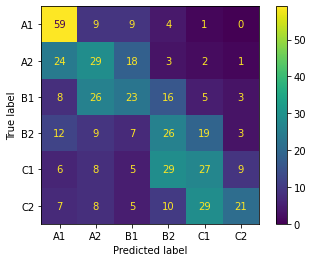

In [296]:
X_trainSVC, X_testSVC, y_trainSVC, y_testSVC = train_test_split(X_class, y_class, test_size=0.1, random_state=72)

classifier = svm.SVC(C=6).fit(X_trainSVC, y_trainSVC)

Accuracy_Test = classifier.score(X_testSVC, y_testSVC)
print("The accuracy for the test is: ", round(Accuracy_Test,2))


disp = plot_confusion_matrix(classifier, X_testSVC, y_testSVC)

### 📈 **Logistic Regression**

{'LR__C': 2, 'LR__max_iter': 1000}
Accuracy of pipeline:  0.421


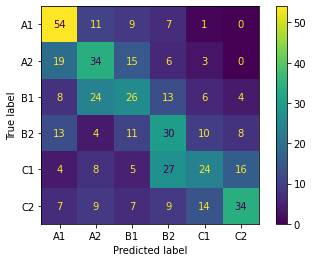

In [294]:
### Hyperparameters optimization

X_trainLRC, X_testLRC, y_trainLRC, y_testLRC = train_test_split(X_class, y_class, test_size = 0.1, random_state = 72)

X_trainLRC = std.fit_transform(X_trainLRC)
X_testLRC = std.fit_transform(X_testLRC)

LogR_std = Pipeline([('scaler', scaler),('LR', LogisticRegression(max_iter = 50000))]) # Standardization (mean 0 std 1)
LogR_std.get_params().keys() # Get params

param_logR = {
   
    'LR__C': (1,2,3,4,5,6,7),
   
    'LR__max_iter': (1000, 5000),
   
    }

grid_search_logR = GridSearchCV(LogR_std, param_logR, cv = 5)
grid_search_logR.fit(X_trainLRC, y_trainLRC)
print(grid_search_logR.best_params_)

Accuracy_basic_logR = grid_search_logR.score(X_testLRC, y_testLRC)
print('Accuracy of pipeline: ', round(Accuracy_basic_logR, 3))

disp = plot_confusion_matrix(grid_search_logR, X_testLRC, y_testLRC)

In [285]:
final_testset

,PRON,AUX,VERB,NOUN,ADP,SCONJ,DET,PROPN,ADJ,CCONJ,SPACE,NUM,ADV,PUNCT,X,Sentences_punctuation_nb,Sentences_len,score,D_cognome
0,2.0,4.0,6.0,17.0,9.0,3.0,12.0,2.0,6.0,1.0,2.0,2.0,1.0,0.0,0.0,15,65,0.000000,2
1,0.0,0.0,1.0,6.0,4.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,18,0.000000,0
2,2.0,0.0,2.0,3.0,1.0,1.0,4.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0,5,21,0.000000,0
3,2.0,1.0,2.0,13.0,11.0,0.0,6.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,9,38,0.000000,1
4,5.0,1.0,5.0,3.0,0.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,3,24,0.079557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,6.0,1.0,6.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0,4,25,0.000000,0
1196,1.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,4,14,0.000000,0
1197,3.0,0.0,2.0,6.0,1.0,0.0,5.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5,20,0.000000,0
1198,2.0,0.0,3.0,9.0,4.0,1.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6,32,1.000000,0


In [286]:
X_testCL = final_testset[['ADP','PRON','ADV','AUX','ADJ','SCONJ','DET','CCONJ','NUM','VERB','PROPN','Sentences_punctuation_nb','score','D_cognome']]

pred_LR= grid_search_logR.predict(X_testCL)

In [288]:
pred_LR = pd.DataFrame(pred_LR)
pred_LR

C2    1107
C1      53
B1      34
B2       6
dtype: int64

### 🏘️ **kNNeighbours**

{'knn__leaf_size': 10, 'knn__n_neighbors': 19, 'knn__p': 2, 'knn__weights': 'uniform'}
Accuracy of word category with KNN is:  0.369


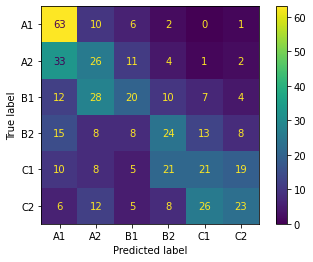

In [289]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X_class, y_class, test_size = 0.1, random_state = 72)

KNN = Pipeline([('knn', KNeighborsClassifier())])

param_knn = {
      'knn__leaf_size': (50, 70, 60,10),
      'knn__p': (1,2),                        # Manhattan/Euclidian distance
      'knn__n_neighbors': (13, 15, 17, 19),   # Tried (1, 5, 9, 21) then refine because knew between 19 and 13
      'knn__weights': ('uniform', 'distance')
    } 

grid_search_knn = GridSearchCV(KNN, param_knn, cv = 5)
grid_search_knn.fit(X_trainKNN,y_trainKNN)
print(grid_search_knn.best_params_)

Accuracy_basic_knn = grid_search_knn.score(X_testKNN, y_testKNN)
print('Accuracy of word category with KNN is: ', round(Accuracy_basic_knn, 3))

pred_yKNN = grid_search_knn.predict(X_testKNN)

disp = plot_confusion_matrix(grid_search_knn, X_testKNN, y_testKNN)

### 🌲 **Decision Trees**

Accuracy of DT no optimization is:  0.306
{'DT__max_depth': 3, 'DT__min_samples_split': 5}
Accuracy of Decision tree optimized is:  0.325


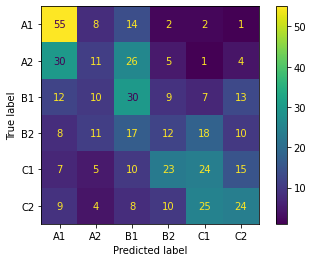

In [290]:
X_trainDT, X_testDT, y_trainDT, y_testDT = train_test_split(X_class, y_class, test_size = 0.1, random_state = 72)

pipeDT = Pipeline([('DT', DecisionTreeClassifier())])                            

pipeDT.fit(X_trainDT, y_trainDT)
print('Accuracy of DT no optimization is: ', round(pipeDT.score(X_testDT, y_testDT), 3))


### Optimization of hyperparameters

param_DT = {'DT__min_samples_split' : [5],'DT__max_depth': [3]} # Started really large (10, 50, 100, 200) then reduced to get between 70 and 75
grid_search_DT = GridSearchCV(pipeDT, param_DT, cv = 5)
grid_search_DT.fit(X_trainDT, y_trainDT)

print(grid_search_DT.best_params_)
print('Accuracy of Decision tree optimized is: ', round(grid_search_DT.score(X_testDT, y_testDT), 3))

disp = plot_confusion_matrix(grid_search_DT, X_testDT, y_testDT)

### 🌳 **Random Forest**

{'RF__bootstrap': True, 'RF__criterion': 'gini', 'RF__n_estimators': 20}
Accuracy of random forest :  0.36


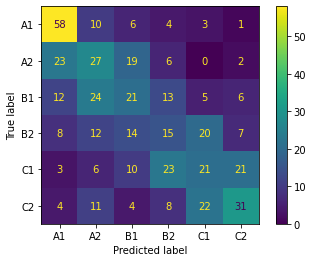

In [291]:
X_trainRF, X_testRF, y_trainRF, y_testRF= train_test_split(X_class, y_class, test_size = 0.1, random_state = 72)

RF = Pipeline([('RF', RandomForestClassifier())])

param_RF = {
      'RF__bootstrap': [True,False], 
      #'RF__max_depth': [80, 90, 100, 110], 
      #'RF__max_features': [5, 10, 20], 
      #'RF__min_samples_leaf' : [3, 4, 5], 
      #'RF__min_samples_split': [10, 17, 11,20,30], 
      'RF__n_estimators': [15,16,17,18,19,20],
      'RF__criterion': ["gini", "entropy"], 
}
    
grid_search_RF = GridSearchCV(RF, param_RF, cv = 5)
grid_search_RF.fit(X_trainRF, y_trainRF)

print(grid_search_RF.best_params_)
print('Accuracy of random forest : ', round(grid_search_RF.score(X_testRF, y_testRF), 3))

disp = plot_confusion_matrix(grid_search_RF, X_testRF, y_testRF)

# 4) **Extra code**

In [ ]:
def words_list(df):

  common_words_cate = df.groupby("Level")["Cleaning7"].apply(lambda x: Counter(" ".join(x).split()).most_common(100)).to_frame()

  len_before = common_words_cate['Cleaning7'].apply(lambda x: len(x))

  common_words_cate = common_words_cate.explode('Cleaning7')
  common_words_cate['word'],common_words_cate['freq'] = common_words_cate.Cleaning7.str
  common_words_cate['len_before'] = common_words_cate['word'].apply(lambda x: len(x))
  common_words_cate = common_words_cate['word'].drop_duplicates().to_frame()
  common_words_cate = common_words_cate.groupby('Level')['word'].apply(list).to_frame()

  len_after = common_words_cate['word'].apply(lambda x: len(x))

  final_df = pd.DataFrame()
  final_df['len_before'] = len_before
  final_df['len_after'] = len_after

  return final_df

words_list(df)


### a) Model combination test

In [ ]:
pred = regr.predict(X_test)

In [ ]:
X_test['Sentences']= df['Sentences']
X1 = X_test['Sentences'].to_frame()


In [ ]:
classifier = svm.SVC(C=6).fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=72)


Accuracy_Test = classifier.score(X_test, y_test)
print("The accuracy for the test is: ", round(Accuracy_Test,2))


disp = plot_confusion_matrix(classifier, X_test, y_test)

 

#### 1) Libraries and account info

In this part you will need to enter the google account info !

In [190]:
!pip install google-cloud-automl

     |████████████████████████████████| 389kB 3.8MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 


In [191]:
# The json document is available at this address:https://github.com/epicalekspwner/BigScaleAnalytics2021/blob/main/Resources/project-bigscale-e16a4fc2448c.json you can download it

# Two possibilities:


# 1) You put the json file on google drive use the below code

from google.colab import drive
drive.mount('/content/gdrive')

#ensure the file is accessible
!ls /content/gdrive/'My Drive'

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/key2.json" # Replace this path with your path on google drive


# 2) If you run local

'''
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/project-bigscale-e16a4fc2448c.json" # Replace this path with your path to json on local machine

'''

#ensure the path is set correctly
!echo $GOOGLE_APPLICATION_CREDENTIALS

Mounted at /content/gdrive
 key1.json    project-bigscale-4f47b8bd1639.json
 key2.json    project-bigscale-e16a4fc2448c.json
 predict.py  'Project BigScale-f383b6f5fded.json'
/content/gdrive/My Drive/key2.json


#### 2) Calling our model

In [192]:
df_testset = pd.read_csv('https://raw.githubusercontent.com/epicalekspwner/BigScaleAnalytics2021/main/Datasets/TESTAICROWD.csv?token=AQ7V5XXOICVOIBBSXSVH27TAT7246')

In [ ]:
df_testset

In [193]:

import sys

from google.api_core.client_options import ClientOptions
from google.cloud import automl_v1
#from google.cloud.automl_v1 import proto
#from google.cloud.automl_v1.proto import service_pb

In [194]:
def get_prediction(phrase, model_name):
  options = ClientOptions(api_endpoint='automl.googleapis.com')
  prediction_client = automl_v1.PredictionServiceClient(client_options=options)

  payload = {'text_snippet': {'content': phrase, 'mime_type': 'text/plain'} }
  # Uncomment the following line (and comment the above line) if want to predict on PDFs.
  # payload = pdf_payload(file_path)

  params = {}
  request = prediction_client.predict(name=model_name, payload=payload, params = params)
  return request  # waits until request is returned

def payload_info(predict):
  Result = predict.payload[0].display_name
  return Result

In [195]:
Test = df_testset['sentence'].apply(lambda x: payload_info(get_prediction(x,'projects/210867998154/locations/us-central1/models/TCN2353841089812627456')))

In [201]:
Test_df = Test.to_frame()
Test_df= Test_df.rename(columns={'sentence':'difficulty'})
Test_df

import csv 

from google.colab import files

Test_df.to_csv("Test_df.csv",index=False, encoding="utf-8")

files.download('Test_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Test1 = Test.to_frame().reset_index()

In [ ]:
Test1['REGRE']= df1[0]

In [ ]:
test_y = y_test.to_frame().reset_index()

In [ ]:
Test1['TRUE_level']=test_y['Level']

In [ ]:
Test1 = Test1.drop('index', axis= 1)

In [ ]:
Test1['Level_PREDICTED_GC'] = Test1['Sentences'].astype('category').cat.codes


In [ ]:
Test1 = Test1.drop('Level_cat', axis = 1)

In [ ]:
Test1 = Test1.drop('Sentences', axis = 1)

In [ ]:
Test1['MEAN']= Test1.drop('TRUE_level', axis = 1).mean(axis=1)

In [ ]:
Test1['COMPARE'] = np.where(Test1["TRUE_level"] == Test1["Level_PREDICTED_GC"], True, False)

In [ ]:
False_X1 = Test1.loc[Test1['COMPARE'] == False]

In [ ]:
False_X1['Mean_round']= False_X1['MEAN'].apply(lambda x: round(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [229]:
import math

In [ ]:
False_X1['Mean_ceil']= False_X1['MEAN'].apply(lambda x: math.ceil(x))
False_X1['COMPARE_CEIL'] = np.where(False_X1["TRUE_level"] == False_X1["Mean_ceil"], True, False)
False_X1['COMPARE_CEIL'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    154
True      41
Name: COMPARE_CEIL, dtype: int64

In [ ]:
False_X1['Mean_FLOOR']= False_X1['MEAN'].apply(lambda x: math.floor(x))
False_X1['COMPARE_FLOOR'] = np.where(False_X1["TRUE_level"] == False_X1["Mean_FLOOR"], True, False)
False_X1['COMPARE_FLOOR'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    154
True      41
Name: COMPARE_FLOOR, dtype: int64

In [ ]:
False_X1['Mean_TRUNC']= False_X1['MEAN'].apply(lambda x: math.trunc(x))
False_X1['COMPARE_TRUNC'] = np.where(False_X1["TRUE_level"] == False_X1["Mean_TRUNC"], True, False)
False_X1['COMPARE_TRUNC'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    154
True      41
Name: COMPARE_TRUNC, dtype: int64

In [ ]:
False_X1['COMPARE_ROUND'] = np.where(False_X1["TRUE_level"] == False_X1["Mean_round"], True, False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
False_X1['COMPARE_ROUND'].value_counts()

False    167
True      28
Name: COMPARE_ROUND, dtype: int64

In [ ]:
Test1['COMPARE'].value_counts()

True     765
False    195
Name: COMPARE, dtype: int64

In [ ]:
class bcolors:
    HEADER = '\033[95m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def payload_info(predict):
  score_prob =[]
  level_prob = []


  for i in range(5):
    score_prob.append(predict.payload[i].classification.score)
    level_prob.append(predict.payload[i].display_name)
    plt.bar(level_prob, score_prob)
    plt.title('Predicted label probaility')
    plt.xlabel('Level')
    plt.ylabel('Probability')
  print('The predicted label is: ',bcolors.BOLD, bcolors.HEADER,predict.payload[0].display_name, '\n','\n')

#### 3) Results

In [ ]:
prediction_info = get_prediction(phrase, 'projects/210867998154/locations/us-central1/models/TCN2353841089812627456')

payload_info(prediction_info)

In [ ]:
X_test['sentence']= df['Sentences']

In [ ]:
X_test['level']= df['Level']

In [ ]:
df3 = pd.DataFrame()
df3['sentence'] = X_test['sentence']
df3['Level'] =X_test['level']
df3


In [ ]:
df3['Test_GC']= Test1

In [ ]:
df3['Regre']= df1['y_test']